# Welcome to ViPrez

## This notebook will convert a video to a power point presentation!

### Import Libraries

In [1]:
%pip install opencv-python python-pptx
%pip install Pillow
%pip install python-pptx
%pip install moviepy
%pip install nltk
%pip install SpeechRecognition
%pip install pydub


In [2]:
from moviepy.video.io.VideoFileClip import VideoFileClip
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist

In [3]:
# Load NLTK resources
import nltk
# punkt- unsupervised trainable model
nltk.download('punkt')
# stopwords- words that are so common they are basically ignored by typical tokenizers
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Input your mp4 video path

In [4]:
# Enter your video here, i've used a sample video
video_path = '/content/taxavoid.mp4'
# VideoFileClip- loads the video
video = VideoFileClip(video_path)

### Converts video to an audio

In [5]:
def convert_video_to_audio(video_path, audio_path):

    # Get the audio portion of the video clip
    audio_clip = video.audio

    # Write the audio to an audio file
    audio_clip.write_audiofile(audio_path)

    # Close the audio and video clips
    audio_clip.close()
    video.close()


### Saves the audio as output_audio.wav

In [6]:
if __name__ == "__main__":
    # Replace these paths with your actual file paths
    input_video_path = "input_video.mp4"
    output_audio_path = "output_audio.wav"

    # Convert the video to audio and save it
    convert_video_to_audio(input_video_path, output_audio_path)

    print("Video converted to audio and saved as output_audio.wav")

MoviePy - Writing audio in output_audio.wav


MoviePy - Done.
Video converted to audio and saved as output_audio.wav


#### Saving it might take a while...

### Converts Audio to Text

In [7]:
# importing libraries
import speech_recognition as sr
import os
from pydub import AudioSegment
from pydub.silence import split_on_silence

# create a speech recognition object
r = sr.Recognizer()

# a function to recognize speech in the audio file
# so that we don't repeat ourselves in in other functions
def transcribe_audio(path):
    # use the audio file as the audio source
    with sr.AudioFile(path) as source:
        audio_listened = r.record(source)
        # try converting it to text
        text = r.recognize_google(audio_listened)
    return text

# a function that splits the audio file into chunks on silence
# and applies speech recognition
def get_large_audio_transcription_on_silence(path):
    """Splitting the large audio file into chunks
    and apply speech recognition on each of these chunks"""
    # open the audio file using pydub
    sound = AudioSegment.from_file(path)
    # split audio sound where silence is 500 miliseconds or more and get chunks
    chunks = split_on_silence(sound,
        # experiment with this value for your target audio file
        min_silence_len = 500,
        # adjust this per requirement
        silence_thresh = sound.dBFS-14,
        # keep the silence for 1 second, adjustable as well
        keep_silence=500,
    )
    folder_name = "audio-chunks"
    # create a directory to store the audio chunks
    if not os.path.isdir(folder_name):
        os.mkdir(folder_name)
    whole_text = ""
    # process each chunk
    for i, audio_chunk in enumerate(chunks, start=1):
        # export audio chunk and save it in
        # the `folder_name` directory.
        chunk_filename = os.path.join(folder_name, f"chunk{i}.wav")
        audio_chunk.export(chunk_filename, format="wav")
        # recognize the chunk
        try:
            text = transcribe_audio(chunk_filename)
        except sr.UnknownValueError as e:
            print("Error:", str(e))
        else:
            text = f"{text.capitalize()}. "
            print (text)
            whole_text += text
    # return the text for all chunks detected
    return whole_text


In [8]:
path = "output_audio.wav"
final_text= get_large_audio_transcription_on_silence(path)


How did apple reduce its global taxes using an irish structure to understand this you'll need a basic understanding of corporate taxation a company pays taxes based on where it's located where its employees are located and where is profits are made also known as tax residency. 
For example. 
Is liable for taxes in the united states. 
Well let's add one layer of complexity. 
What happens if the irish company is a subsidiary of the us corporation which effectively means that the us company controls and owns the irish company does uncle sam get a cut of the irish prophet yes. 
Error: 
Error: 
Corporate taxes forever why do you think apple kept so much cash in ireland. 
Error: 
This was true until 2017 before the new rules were introduced by this man. 
Today on repatriated profits can still be taxed in the us. 
Go back to the video now that you understand how taxes work let's take a look at why ireland. 
Error: 
Error: 
Error: 
Error: 
None of the above. 
Irish corporate tax rate is 12.5%.

#### Check out your final text!

In [9]:
final_text

"How did apple reduce its global taxes using an irish structure to understand this you'll need a basic understanding of corporate taxation a company pays taxes based on where it's located where its employees are located and where is profits are made also known as tax residency. For example. Is liable for taxes in the united states. Well let's add one layer of complexity. What happens if the irish company is a subsidiary of the us corporation which effectively means that the us company controls and owns the irish company does uncle sam get a cut of the irish prophet yes. Corporate taxes forever why do you think apple kept so much cash in ireland. This was true until 2017 before the new rules were introduced by this man. Today on repatriated profits can still be taxed in the us. Go back to the video now that you understand how taxes work let's take a look at why ireland. None of the above. Irish corporate tax rate is 12.5%. Enough friends in australia charge 30%. Ireland has had a long-s

## Creates Presentation

In [10]:
# Import libraries
from pptx import Presentation
from pptx.util import Inches
import cv2
from google.colab.patches import cv2_imshow

# Function to create a PowerPoint presentation
def create_presentation(slides_data):
    # Create a new PowerPoint presentation object
    prs = Presentation()

    # Iterate through each slide's content and create a slide
    for slide_content in slides_data:
        title, image_path = slide_content

        # Add a blank slide using the blank slide layout (index 5)
        slide = prs.slides.add_slide(prs.slide_layouts[5])

        # Define position and size for the text box
        left = Inches(1)
        top = Inches(1)
        width = Inches(3)
        height = Inches(2)

        # Add a text box to the slide and set its content
        text_box = slide.shapes.add_textbox(left, top, width, height)
        text_frame = text_box.text_frame
        p = text_frame.add_paragraph()
        p.text = title

        # If an image is provided, add it to the slide
        if image_path:
            left = Inches(2)
            top = Inches(2)
            pic = slide.shapes.add_picture(image_path, left, top, width, height)

    # Save the presentation to a file
    prs.save("presentation.pptx")
    print("Presentation saved as presentation.pptx")



## Important Instructions!!
1. Enter how many pages you want.
2. Enter Images according to the number of pages
3. More instructions throughout the code, please follow along 😸

In [12]:
image_paths = ['/content/ss1.png','/content/ss3.45.24 AM.png','/content/Screenshot 2023-08-26 12.47.03 AM.png','/content/Screenshot 2023-08-26 12.46.56 AM.png','/content/Screenshot 2023-08-26 12.46.46 AM.png','/content/Screenshot 2023-08-26 12.46.29 AM.png','/content/ss2.46.21 AM.png','/content/ss3.45.08 AM.png'] # enter image paths here

# Split the text into chunks for each slide
words = final_text.split()

slide_pages = 7 # Enter pages here (should be equal to the number of images)

n = len(words) // slide_pages
chunks = [words[i:i + n] for i in range(0, len(words), n)]
total_pages = len(chunks)

slides_data = []  # Initialize an empty list to store slide data

print('slide pages- ',slide_pages)
print('total pages- ',total_pages)
print("if total pages are more than slide pages then, add one more image to image_paths and run this again, don't worry about the slide pages this time")
print("if not, go ahead :)")

slide pages-  7
total pages-  8
if total pages are more than slide pages then, add one more image to image_paths and run this again, don't worry about the slide pages this time
if not, go ahead :)


### Saves your presentation (finally!)

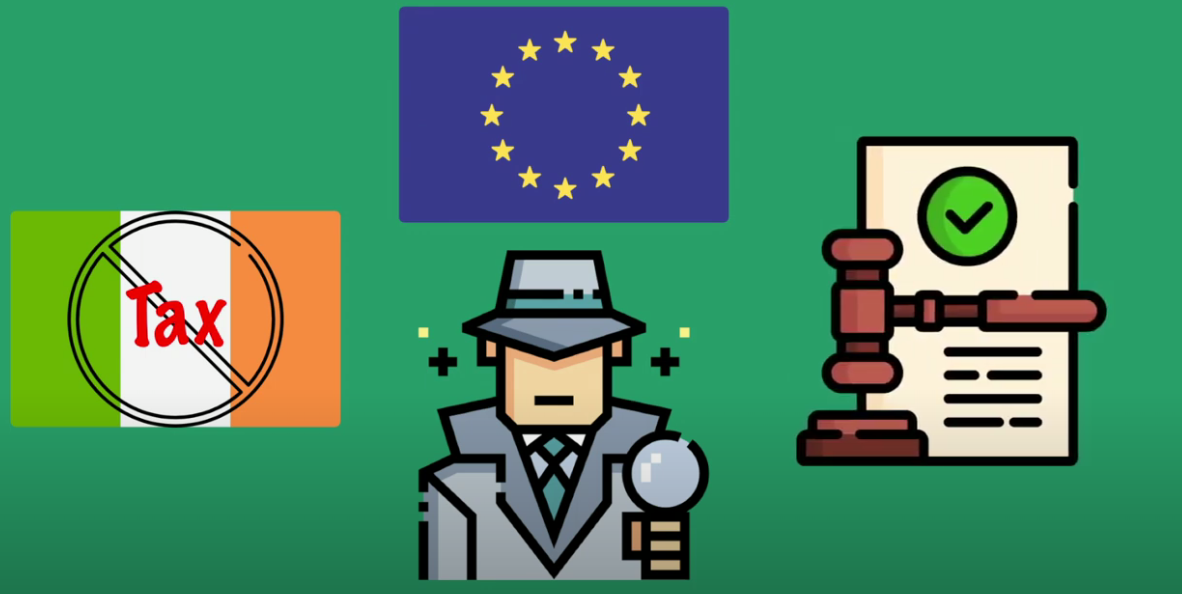

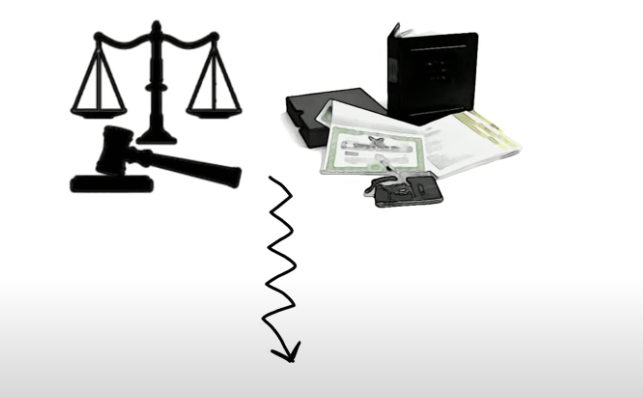

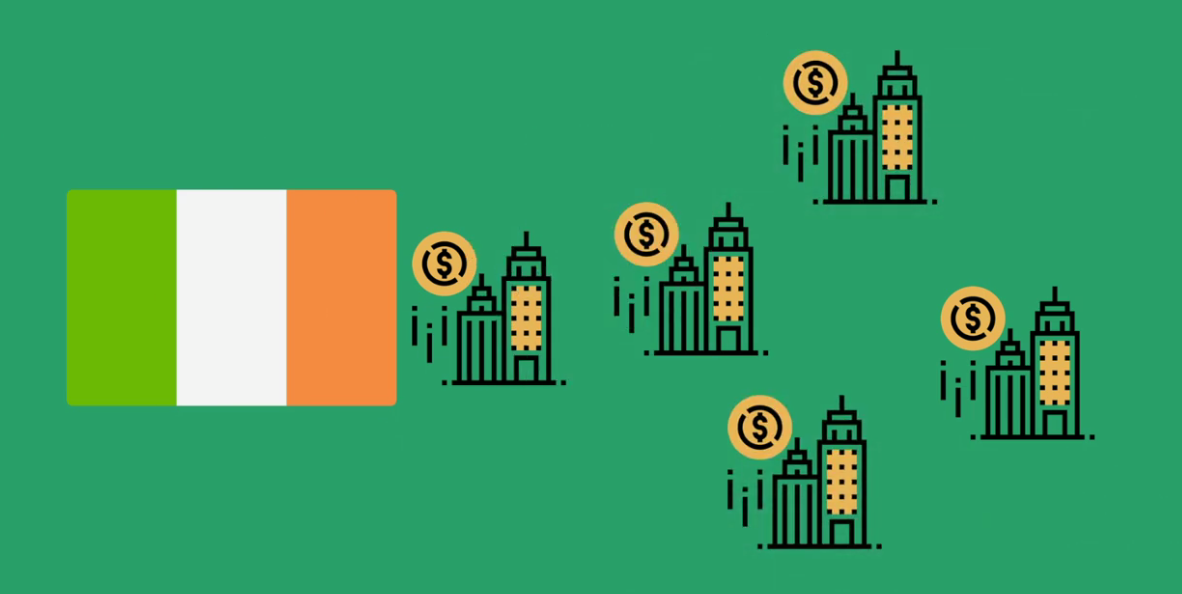

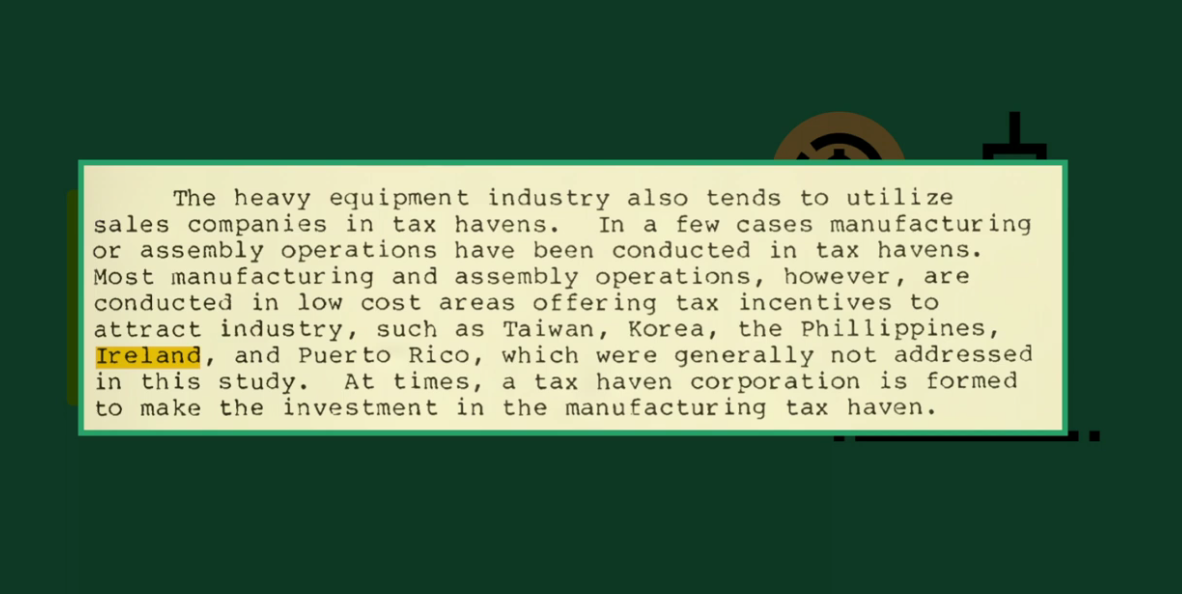

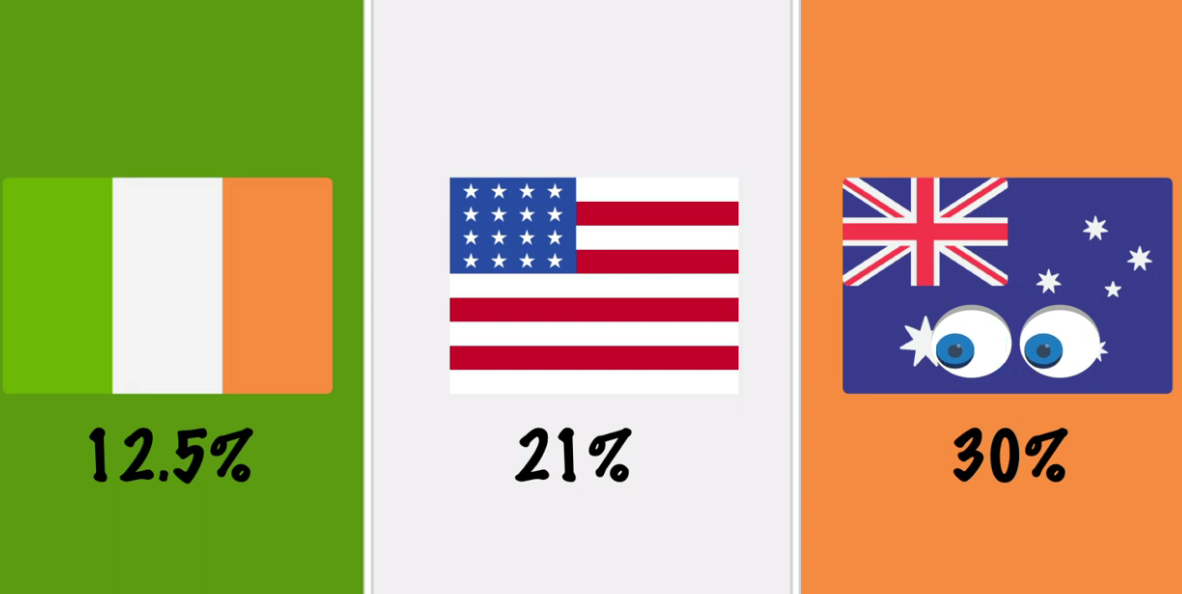

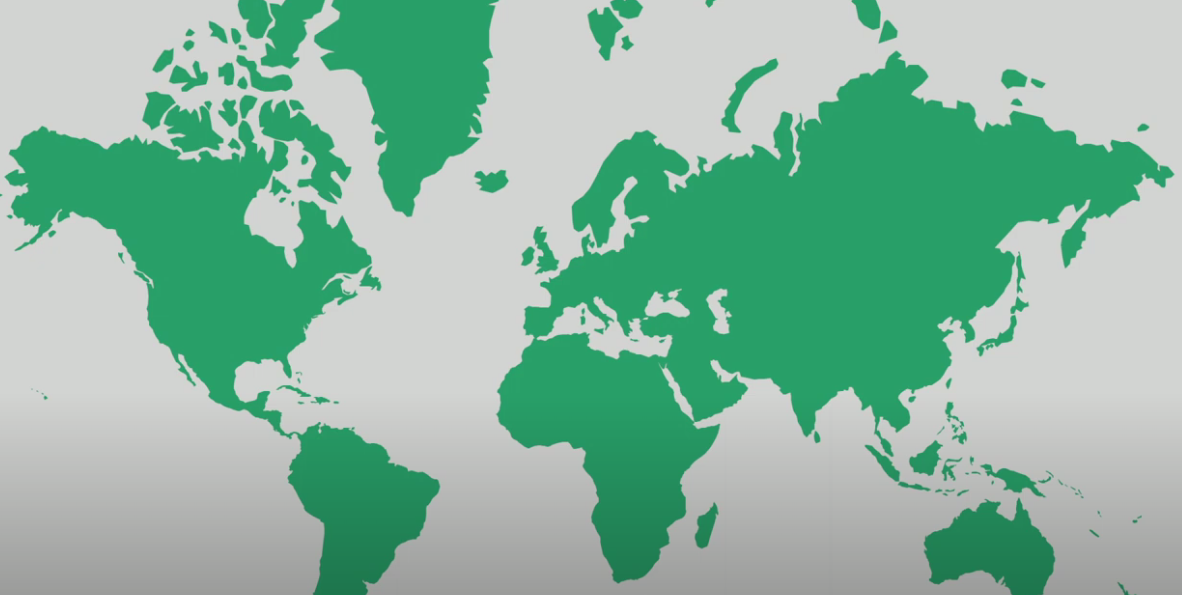

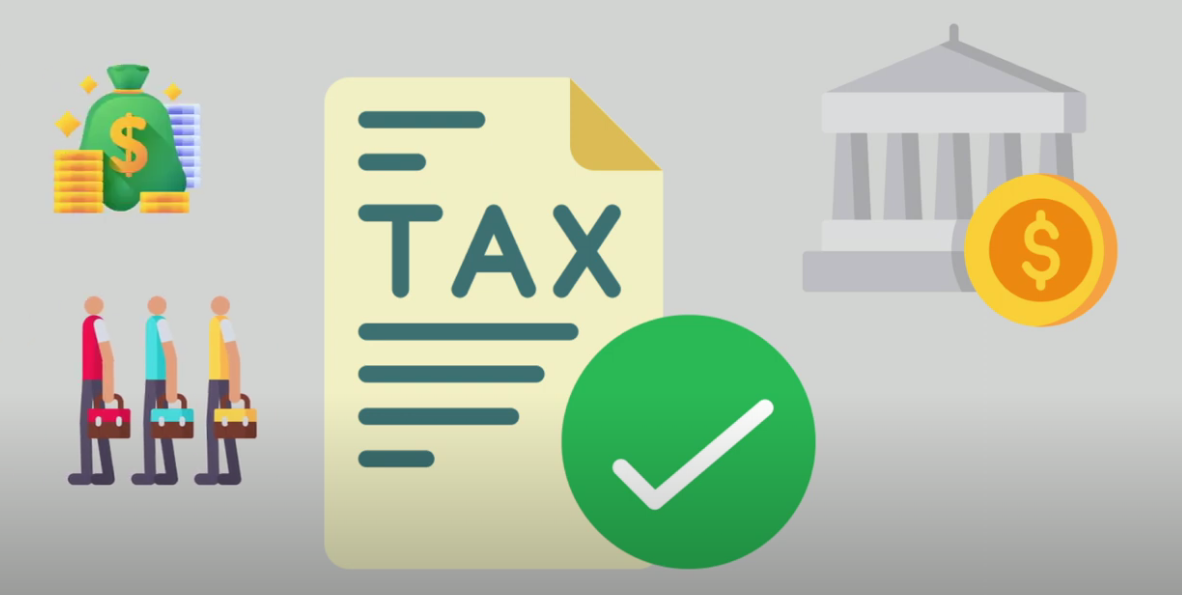

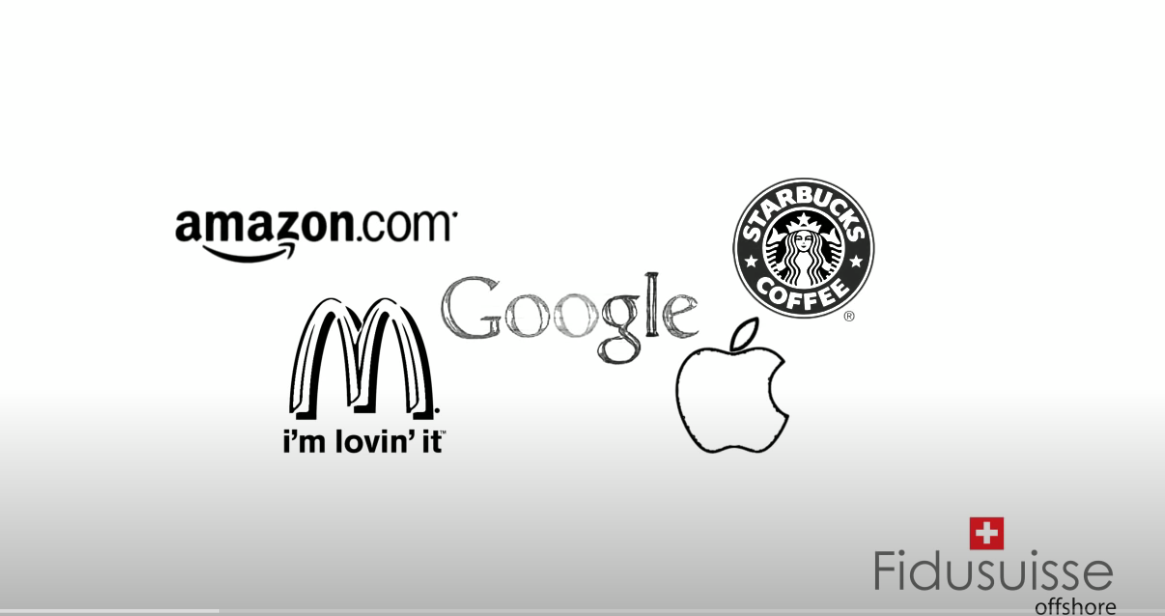

Presentation saved as presentation.pptx


In [13]:
if __name__ == "__main__":

    # Iterate through text chunks and corresponding image paths
    for chunk, image_path in zip(chunks, image_paths):
        img = cv2.imread(image_path)  # Load image using OpenCV
        cv2_imshow(img)  # Display the image using Google Colab's cv2_imshow
        cv2.waitKey(0)
        cv2.destroyAllWindows()

        # Store chunk of text and image path in slides_data list
        slides_data.append((' '.join(chunk), image_path))

    # Create the presentation using the provided data
    create_presentation(slides_data)


#### Saving the ppt might take a while...